# Introduction to Python

## Biostats Computing Workshop

### Motivational Example

<img src="http://images1.villagevoice.com/imager/u/original/6699280/got21.jpg" style="width: 600px;">

In [5]:
 ## SO MANY LIBRARIES
from bs4 import BeautifulSoup as bs ## Importing an Object!
import urlparse 
from urllib2 import urlopen ## Importing some functions!
from urllib import urlretrieve
import unicodedata
import os
import sys
from __future__ import division ## Oddity with division

In [9]:
URL = "http://www.readbooksvampire.com/George_R.R._Martin/A_Game_of_Thrones.html" ## CAPS = GLOBAL CONSTANT

In [10]:
soup = bs(urlopen(URL)) ### Creating a 'bs' object here

In [11]:
parsed = list(urlparse.urlparse(URL)) ## list is the Python ordered array data structure

In [12]:
i = 0
# chapters = []
for link in soup.find_all('a'): ## This is what a 'for loop' looks like in python
    if "George_R.R._Martin/A_Game_of_Thrones/" in link.get('href'): # some if statements!
        print(link.get('href'))
        # chapters.append(link.get('href'))
        i+=1
    if i > 6:
        break

/George_R.R._Martin/A_Game_of_Thrones/01.html
/George_R.R._Martin/A_Game_of_Thrones/02.html
/George_R.R._Martin/A_Game_of_Thrones/03.html
/George_R.R._Martin/A_Game_of_Thrones/04.html
/George_R.R._Martin/A_Game_of_Thrones/05.html
/George_R.R._Martin/A_Game_of_Thrones/06.html
/George_R.R._Martin/A_Game_of_Thrones/07.html


## OOOOOO LIST COMPREHENSION

In [13]:
chapters = [ link.get('href') for link in soup.find_all('a') 
            if "George_R.R._Martin/A_Game_of_Thrones/" in link.get('href')]
chapters[:5]

['/George_R.R._Martin/A_Game_of_Thrones/01.html',
 '/George_R.R._Martin/A_Game_of_Thrones/02.html',
 '/George_R.R._Martin/A_Game_of_Thrones/03.html',
 '/George_R.R._Martin/A_Game_of_Thrones/04.html',
 '/George_R.R._Martin/A_Game_of_Thrones/05.html']

In [14]:
## lets check this out for chapter 1
chapter1_url = URL[:-5] + chapters[0][len(chapters[0])-8:] ## look at this fancy string slicing!!!

```
URL[:-5] ## gets everything but the last five characters in the string
http://www.readbooksvampire.com/George_R.R._Martin/A_Game_of_Thrones     .html
```

```
chapters[0][len(chapters[0])-8:] ## lets break this down one piece at a time
```

```
chapters[0] ## this is the object holding the text string for the first chapter
>>/George_R.R._Martin/A_Game_of_Thrones/01.html'
```

```
## I'm now accessing a string object, but now I only want the last 8 characters!
len(chapters[0]) ## gives me the entire length of the string
len(chapters[0])-8 ## Length of string minus 8
chapters[0][len(chapters[0])-8:] 
#Gives me the entire string of the first chapter url, starting 8 characters back
>>/01.html
```

```
URL[:-5] + chapters[0][len(chapters[0])-8:] ## I stick the two strings together with the '+' sign!
```

In [15]:
chapter1_url

'http://www.readbooksvampire.com/George_R.R._Martin/A_Game_of_Thrones/01.html'

In [16]:
soup_1 = bs(urlopen(chapter1_url)) ## Creating a Soup Object!

In [80]:
# soup_1.get_text()

## lets get the whole book

##### What would this look like in a for loop?

In [15]:
chapter_num = 1
for chapter in chapters: ## notice the arbitrary indexing -- this is a property called __iter__ for iteration
    chapter_num_url = URL[:-5] + chapters[0][len(chapter)-8:]
    bs(urlopen(chapter_num_url)).get_text()

### Lets be cool and use a list comprehension

In [29]:
def get_GoT(chapter):
    """
    Returns all the GoT text within the parameter chapter
    P.S. Docstrings are great for making sure other people
    who read your code know what you're doing with your
    custom functions and objects
    """
    chapter_num_url = URL[:-5] + chapter[len(chapter)-8:]
    return bs(urlopen(chapter_num_url)).get_text()

In [30]:
GoT = [get_GoT(chapter) for chapter in chapters] ## takes a couple minutes

### Not always wise to do this, servers and their admins will be upset if you make a lot of requests in a short amount of time

In [31]:
len(GoT),len(chapters)

(72, 72)

In [32]:
GoT[0][:100]

u'\n\nA Game of Thrones(Song of Ice and Fire Book 1) by George R.R. Martin | Chapter One | Read Vampire '

In [33]:
GoT[71][:100] ## zero indexed arrays/lists

u'\n\nA Game of Thrones(Song of Ice and Fire Book 1) by George R.R. Martin | Chapter Seventy-two | Read '

In [34]:
type(GoT[0]),type(unicodedata.normalize('NFKD', GoT[0]).encode('ascii','ignore'))

(unicode, str)

In [35]:
GoT = [unicodedata.normalize('NFKD',chapter).encode('ascii','ignore') for chapter in GoT] ## Another LC!

In [102]:
!mkdir GoT

In [16]:
os.chdir("GoT")

In [122]:
for chapter_num in range(1,73):
    with open("Chapter "+str(chapter_num) + ".txt","w") as chap: ## file access!
        chap.write(GoT[chapter_num-1])

In [36]:
book_string = ""
for chapter in GoT:
    book_string += chapter

In [37]:
len(book_string)

1616629

In [38]:
with open("GoT_bookone.txt","w") as book:
    book.write(book_string)

In [39]:
!ls

GoT                            Python_Reference.aux
GoT.ipynb                      Python_Reference.log
GoT_bookone.txt                Python_Reference.out
PythonIntroduction.ipynb       Python_Reference.pdf
PythonIntroduction.slides.html Python_Reference.synctex.gz
Python_Exercises               Python_Reference.tex
Python_Exercises.aux           README.md
Python_Exercises.log           Slideshow Support.ipynb
Python_Exercises.out           hello_world.png
Python_Exercises.pdf           rpython.png
Python_Exercises.synctex.gz    texput.log
Python_Exercises.tex


In [22]:
import re ## regular expressions library

In [40]:
wic = re.findall("[Ww][Ii][Nn][Tt][Ee][Rr] [Ii][Ss] [Cc][Oo][Mm][Ii][Nn][Gg]",book_string)
wic,len(wic)

(['winter is coming',
  'Winter is coming',
  'Winter is coming',
  'winter is coming',
  'Winter is coming',
  'Winter is coming',
  'Winter is coming',
  'Winter is coming',
  'Winter is coming',
  'winter is coming',
  'Winter is coming'],
 11)

<img src="http://cdn.pastemagazine.com/www/system/images/photo_albums/game-of-thrones-memes/large/13883.jpg?1384968217">

In [41]:
Starks= "[Ww][Ii][Nn][Tt][Ee][Rr] [Ii][Ss] [Cc][Oo][Mm][Ii][Nn][Gg]"
Lannisters = "[Aa] [Ll]annister [Aa]lways [Pp]ays [Hh]is debts"
Lannister_actual = "[Hh]ear [Mm]e [Rr]oar!"

In [42]:
search_string = re.compile(Starks)
find = search_string.search(book_string)

In [43]:
find.span()

(21266, 21282)

In [44]:
for position in search_string.finditer(book_string):
    print position.start()

21266
21561
103321
300227
313673
392475
420761
730895
780740
1299233
1299288


In [45]:
Stark_Positions = [position.start()/len(book_string) for position in search_string.finditer(book_string)]

In [46]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

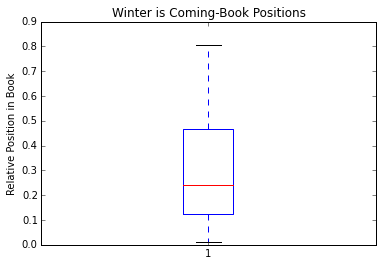

In [49]:
plt.boxplot(Stark_Positions)
plt.title("Winter is Coming-Book Positions")
plt.ylabel("Relative Position in Book")
plt.show()

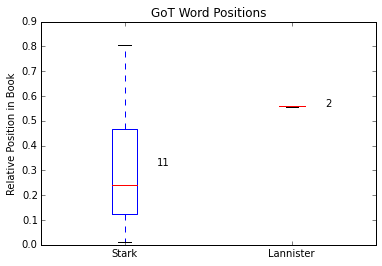

In [88]:
search_string = re.compile(Lannisters)
Lannister_positions = [position.start()/len(book_string) for position in search_string.finditer(book_string)]
plt.boxplot([Stark_Positions,Lannister_positions])
plt.title("GoT Word Positions")
plt.xticks([1,2],["Stark","Lannister"])
plt.text(1.2,np.mean(Stark_Positions),str(len(Stark_Positions)))
plt.text(2.2,np.mean(Lannister_positions),str(len(Lannister_positions)))
plt.ylabel("Relative Position in Book")
plt.show()

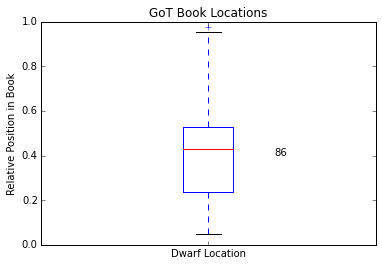

In [98]:
search_string = re.compile("[Dd]warf")
dwarf_pos = [position.start()/len(book_string) for position in search_string.finditer(book_string)]
plt.boxplot([dwarf_pos])
plt.title("GoT Book Locations")
plt.xticks([1],["Dwarf Location"])
plt.text(1.2,np.mean(dwarf_pos),str(len(dwarf_pos)))
plt.ylabel("Relative Position in Book")
plt.show()

<img src="http://cdn.pastemagazine.com/www/system/images/photo_albums/game-of-thrones-memes/large/21-memes-got-hipster-jon-snow-old-gods.jpg?1384968217">